In [1]:
import os
os.chdir('..')
os.listdir()

['auto_handler.py',
 'data',
 'int2cmd_dict.jobfile',
 'LoadDataset.py',
 'mjpg_encoding.avi',
 'model',
 'model.py',
 'nn.joblib',
 'object_dataset',
 'opencv_record_test.avi',
 'recvids.py',
 'server.py',
 'server_handler.py',
 'test.csv',
 'test.py',
 'vid1.avi',
 '__pycache__']

In [2]:
import LoadDataset as ld
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
h = ld.VideoDatasetHandler('data')
h.checkDir()
frames, tags = h.getAllVidArray(gray=False, flatten=False, dtype=None)

Initializing for capturing all videos in "data" master dir ...
Initialization Complete.
Summary:
	Scene dirs: ['scene1']
	No of videos: 61
	No of Frames in all scene dirs: 1922
	Frame Shape: (480, 640, 3)
	Frame dtype: uint8
Stacking all videos in data master directory

	***************************************************
	Scene Dir: 1/1
	Current Scene Dir: data\scene1
	Initializing for capturing all videos in data\scene1 scene dir ...
	Initialization Complete.
	Summary:
		Videos dir path: data\scene1\videos
		No of videos: 61
		No of Frames in video dir: 1922
		Frame Shape: (480, 640, 3)
	Frame dtype: uint8

	Stacking All Videos in data\scene1\videos
	Stacking Scene Directory Complete.

	***************************************************

Stacking Master Directory Complete




In [4]:
frames.shape, tags.shape

((1922, 480, 640, 3), (1922,))

(1034,)


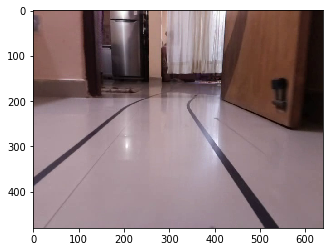

In [5]:
fwd_indices = np.argwhere(tags == "b'FWD050\\n'").flatten()
print(fwd_indices.shape)
frame = frames[fwd_indices[100]]
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
plt.show()

In [7]:
frame1 = cv2.cvtColor(frames[fwd_indices[700]], cv2.COLOR_RGB2BGR)
frame2 = cv2.cvtColor(frames[fwd_indices[701]], cv2.COLOR_RGB2BGR)
print(frame1.shape, frame2.shape)

(480, 640, 3) (480, 640, 3)


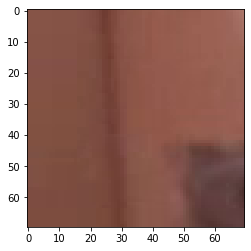

In [25]:
def crop(arr, row_start, row_end, col_start, col_end):
    return arr[row_start:row_end, col_start:col_end]
plt.imshow(crop(frame1, 0, 70, 0, 70))


(70, 70, 3) uint8
(70, 70, 3) uint8


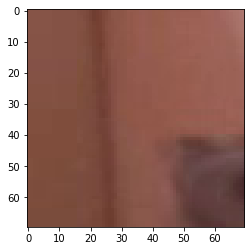

In [64]:
frame1_sel_reg = crop(frame1, 0, 70, 0, 70)
frame2_sel_reg = crop(frame2, 0, 70, 0, 70)
plt.imshow(frame2_sel_reg)

In [26]:
diff1 = cv2.cvtColor(frame1_sel_reg - frame2_sel_reg, cv2.COLOR_BGR2GRAY)
print(diff1.shape, diff1.dtype)
plt.imshow(diff1, cmap='gray')

NameError: name 'frame1_sel_reg' is not defined

In [27]:
def getframe(frame_no, frames, fwd_indices, gray=False, bgr=False):
    if(gray == True):
        return cv2.cvtColor(frames[fwd_indices[frame_no]], cv2.COLOR_RGB2GRAY)
    elif(bgr == True):
        return cv2.cvtColor(frames[fwd_indices[frame_no]], cv2.COLOR_RGB2BGR)
    else:
        return frames[fwd_indices[frame_no]]

In [28]:
def get2framediff(frame1, frame2, region_interest_tuple):
    x1, x2, y1, y2 = region_interest_tuple
    frame1_sel_reg = crop(frame1, x1, x2, y1, y2)
    frame2_sel_reg = crop(frame2, x1, x2, y1, y2)
    return frame1_sel_reg - frame2_sel_reg

In [ ]:
cv2.imshow('frame', crop(frame1, 180, 480, 0, 640))
if(cv2.waitKey(0) == ord('q')):
    cv2.destroyAllWindows()

(480, 640, 3) uint8


In [41]:
def avgframediff(frame1, frame2, multiplier=1, region_interest_tuple=None):
    if(region_interest_tuple == None):
        region_interest_tuple = (0, frame1.shape[0], 0, frame1.shape[1])
    x1, x2, y1, y2 = region_interest_tuple
    cropped_frame1 = crop(frame1, x1, x2, y1, y2)
    cropped_frame2 = crop(frame2, x1, x2, y1, y2)
    return (np.average(cropped_frame1 - cropped_frame2)) * multiplier

avgframediff(frames[fwd_indices[0]], frames[fwd_indices[1]])


75.84980360243055

avg diff = 94.12606119791667


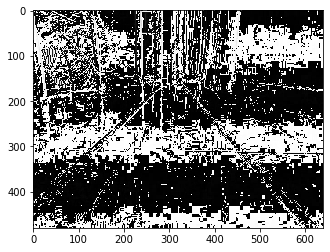

In [100]:
frame1 = getframe(4, frames, fwd_indices, gray=True)
frame2 = getframe(5, frames, fwd_indices, gray=True)
reg_tuple = (0, 480, 0, 640)
diff = avgframediff(frame1, frame2, region_interest_tuple=reg_tuple)
print("avg diff =", diff)
plt.imshow(get2framediff(frame1, frame2, region_interest_tuple=reg_tuple), cmap='gray')

In [86]:
Vo=

In [5]:
def getCmdDict(tags):
    return {y:x for x, y in enumerate(np.unique(tags), 1)}, {x:y for x, y in enumerate(np.unique(tags), 1)}
cmd2int_dict, int2cmd_dict = getCmdDict(tags)
#tags

In [6]:
def encodeTags(tags, cmd2int_dict, dtype=np.int32):
    tag_int = np.empty(tags.shape, dtype=np.int32)
    for i in range(int(tags.size)):
        tag_int[i] = cmd2int_dict[tags[i]]
    return tag_int

tag_int = encodeTags(tags, cmd2int_dict)    

In [7]:
frames.shape, frames.dtype, tag_int.shape, tag_int.dtype

((1922, 307200), dtype('float32'), (1922,), dtype('int32'))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(frames, tag_int, test_size=0.3, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1345, 307200), (1345,), (577, 307200), (577,))

In [10]:
nn = MLPClassifier(verbose=True, random_state=42)

In [11]:
nn.fit(frames, tag_int)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 17.04361308
Iteration 4, loss = 9.83459609
Iteration 5, loss = 5.50956820
Iteration 6, loss = 3.48001064
Iteration 7, loss = 2.29442031
Iteration 8, loss = 1.43700688
Iteration 9, loss = 1.35569186
Iteration 10, loss = 1.53522127
Iteration 11, loss = 2.76034283
Iteration 12, loss = 4.33515354
Iteration 13, loss = 1.86665488
Iteration 14, loss = 1.20068720
Iteration 15, loss = 0.50199743
Iteration 16, loss = 0.32669284
Iteration 17, loss = 0.24746821
Iteration 18, loss = 0.42298399
Iteration 19, loss = 0.39752313
Iteration 20, loss = 1.45173042
Iteration 21, loss = 3.13363653
Iteration 22, loss = 0.78946361
Iteration 23, loss = 0.64278310
Iteration 24, loss = 0.19681695
Iteration 25, loss = 0.85760916
Iteration 26, loss = 0.41292974
Iteration 27, loss = 0.27898171
Iteration 28, loss = 0.43733010
Iteration 29, loss = 0.17266517
Iteration 30, loss = 0.10285989
Iteration 31, loss = 0.37477088
Iteration 32, loss = 0.2288600

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [12]:
nn.score(x_test, y_test)

0.8440207972270364

In [13]:
from joblib import dump

In [14]:
dump(nn, 'nn.joblib')

['nn.joblib']

In [15]:
dump(int2cmd_dict, 'int2cmd_dict.jobfile')

['int2cmd_dict.jobfile']